# Imports :

In [7]:
import numpy as np
import math
import scipy.io
import csv
from IPython.display import display
from scipy import sparse
import os.path
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDRegressor,PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
import time
import matplotlib.pyplot as plt
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('movie_reviews')
#removing stopwords
from nltk import word_tokenize,sent_tokenize

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## drawing tools
# Load libraries

# Math
import numpy as np

# Visualization 
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

# High-res visualization (but no rotation possible)
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')

# Print output of LFR code
import subprocess

# Sparse matrix
import scipy.sparse
import scipy.sparse.linalg

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Import data
import scipy.io

# Import functions in lib folder
import sys
sys.path.insert(1, 'lib')

# Import helper functions
%load_ext autoreload
%autoreload 2

# Import distance function
import sklearn.metrics.pairwise

# Remove warnings
import warnings
warnings.filterwarnings("ignore")




def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sbeuret/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sbeuret/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/sbeuret/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# Datasets & Preprocessing

** Sentimental Analysis Text dataset: **

In [50]:
SAT_data =[]
with open('Projectdataset/Sentiment Analysis Dataset.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
    for row in spamreader:
        SAT_data.append(row) 
SAT_data = SAT_data[2:]
SAT_data = [[row[1],row[3]] for row in SAT_data]
SAT_data = np.array(SAT_data)
#SAT_data[:,0] = [int(float(x))*5 for x in SAT_data[:,0]]
SAT_data_chunk = SAT_data[0:8000]
print('Length = {} '.format(len(SAT_data)))
print('Type = {}'.format(type(SAT_data)))
print(SAT_data[0:5])


Length = 1578613 
Type = <class 'numpy.ndarray'>
[['0' '                   I missed the New Moon trailer...']
 ['1' '              omg its already 7:30 :O']
 ['0'
  "          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)..."]
 ['0' '         i think mi bf is cheating on me!!!       T_T']
 ['0' '         or i just worry too much?        ']]


** Amazon dataset: **

In [5]:
Amazon_data = []
file4 = open("Projectdataset/amazonMP3reviews/amazon_mp3", "r")
data4 = file4.read()

data4 = data4.split("#####")
for i in range(1,len(data4)):
    text = find_between_r( data4[i], "[fullText]:", "[rating]" )
    text = text.replace("\n",'')
    rating = find_between_r( data4[i],"[rating]:","[recommend]")
    Amazon_data.append([float(rating),text])
Amazon_data = np.asarray(Amazon_data)
Amazon_data_chunk = Amazon_data[0:8000]
Amazon_data[:,0] = [int(float(x)) for x in Amazon_data[:,0]]
print('Length = {} '.format(len(Amazon_data)))
print('Type = {}'.format(type(Amazon_data)))

Length = 31000 
Type = <class 'numpy.ndarray'>


** TripAdvisor dataset **

In [4]:
tripAdvisor_data1 = []
path = 'Projectdataset/tripadvisor/Aspects'
dirs = os.listdir(path)


for direct in dirs:
    #print(direct)
    file5 = open(path+'/'+direct, "r")
    data5 = file5.read()
    data5 = data5.split("<Author>")
    data5 = data5[1:]
    for data in data5:
        ignore = False;
        text = find_between_r( data, "<Content>", "<Date>")
        text = text.replace("\n",'')
        rank = find_between_r( data, "<Rating>", "<Aspects>")
        rank = rank.rstrip().split('\t') 
        if (rank ==['']):
                ignore = True
        if not (ignore): 
            rank = [float(x) for x in rank]
            rank =round(np.mean(rank))
            tripAdvisor_data1.append((rank, text))
       
        
            


KeyboardInterrupt: 

In [6]:
tripAdvisor_data2=np.asarray(tripAdvisor_data1[0:9000])
#tripAdvisor_data1=np.asarray(tripAdvisor_data1)
#tripAdvisor_data1 = [list(elem) for elem in tripAdvisor_data1]
tripAdvisor_data = [];
for row in tripAdvisor_data1:
    tripAdvisor_data.append([abs(int(row[0])), row[1]])

print('Length = {} '.format(len(tripAdvisor_data)))
print('Type = {}'.format(type(tripAdvisor_data)))

print(tripAdvisor_data[0:5])
print(type(tripAdvisor_data[0][0]))


Length = 198979 
Type = <class 'list'>
[[4, "Wonderful time- even with the snow! What a great experience! From the goldfish in the room (which my daughter loved) to the fact that the valet parking staff who put on my chains on for me it was fabulous. The staff was attentive and went above and beyond to make our stay enjoyable. Oh, and about the parking: the charge is about what you would pay at any garage or lot- and I bet they wouldn't help you out in the snow!  "], [4, "Lovely hotel, unique decor, friendly front desk staff, central location It's only recently that I've started staying at boutique hotels, so I'm definitely not an expert on the subtleties that these types of establishments provide. But I've already stayed at a few Kimptons and I must say that my experiences are mostly good. Hotel Monaco is no exception. The decor at the Kimpton Hotels is always unique - they have a wonderful way of pulling off colors, textures and patterns so one feels cool and trendy yet comfortable. 

In [96]:
positivefile = open('positive-words.txt', "r")
positive=positivefile.read().split(";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;")
wordspos = positive[2].split("\n")
wordspos=wordspos[2:]

negativefile = open('negative-words.txt', "r")
negative=negativefile.read().split(";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;")
wordsneg = negative[2].split("\n")
wordsneg=wordsneg[2:]

vocabulary_dict = []
i = 0;
for item in wordspos:
    vocabulary_dict.append( [item,i])
    i+=1
for item in wordsneg:
    vocabulary_dict.append( [item,i])
    i+=1

print(wordspos[0])
print(vocabulary_dict)

a+
[['a+', 0], ['abound', 1], ['abounds', 2], ['abundance', 3], ['abundant', 4], ['accessable', 5], ['accessible', 6], ['acclaim', 7], ['acclaimed', 8], ['acclamation', 9], ['accolade', 10], ['accolades', 11], ['accommodative', 12], ['accomodative', 13], ['accomplish', 14], ['accomplished', 15], ['accomplishment', 16], ['accomplishments', 17], ['accurate', 18], ['accurately', 19], ['achievable', 20], ['achievement', 21], ['achievements', 22], ['achievible', 23], ['acumen', 24], ['adaptable', 25], ['adaptive', 26], ['adequate', 27], ['adjustable', 28], ['admirable', 29], ['admirably', 30], ['admiration', 31], ['admire', 32], ['admirer', 33], ['admiring', 34], ['admiringly', 35], ['adorable', 36], ['adore', 37], ['adored', 38], ['adorer', 39], ['adoring', 40], ['adoringly', 41], ['adroit', 42], ['adroitly', 43], ['adulate', 44], ['adulation', 45], ['adulatory', 46], ['advanced', 47], ['advantage', 48], ['advantageous', 49], ['advantageously', 50], ['advantages', 51], ['adventuresome', 52

# Classifier trained on SAT dataset
** Feature Extraction
** 






In [211]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def column(matrix, i):
    return [row[i] for row in matrix]
def compute_bag_of_words(text, stopwords , vocab=None):
    vectorizer = CountVectorizer(stop_words = stopwords,vocabulary=vocab)
    vectors = vectorizer.fit_transform(text)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary



text_sat = column(SAT_data,1)
Y_sat = np.asarray(column(SAT_data,0))
  
bow, vocab = compute_bag_of_words(text_sat, stopwords.words())
KBestModel = SelectKBest(chi2, k=1000).fit(bow, Y_sat)  
indices = KBestModel.get_support(True)
bow_transformed = KBestModel.transform(bow)


NameError: name 'SAT_data' is not defined

In [212]:
from sklearn.externals import joblib
#sving best features
print("bow = {}".format(bow.shape))
print("bow_transformed = {}".format(bow_transformed.shape))
best_features_Sat = np.array(vocab)[indices]
print(best_features_Sat)

file = open('Best_Features_SAT.txt', 'w')
for word in best_features_Sat:
    file.write("%s\n" % word)    
    



NameError: name 'bow' is not defined

In [213]:
#input X is list of strings 
def Transform_To_Input_Format_SAT_Classifiers(X):
    with open('Best_Features_SAT.txt') as f:
        features = f.readlines()
    features = [x.strip("\n") for x in features]
    X_transformed,vocab = compute_bag_of_words(X, stopwords.words(),features)
    return X_transformed,vocab,features
#Example how to use
#Xinput = Transform_To_Input_Format_SAT_Classifiers(["i am feeling terrible today","I don't like this"])

In [104]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold

test_stats = {'n_test': 0, 'n_test_pos': 0}
def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s



batches = []
y_all = np.unique(Y_sat)


minibatch_size = 10000
# divide data into batches
i = 0
start = 0
while(start < X_new.shape[0]):
    if(start + minibatch_size < X_new.shape[0]):
        batch = X_new[start:start+minibatch_size]
        batches.append(batch)
        start+=minibatch_size
    else:
        batch = X_new[start:]
        batches.append(batch)
        start+=minibatch_size
        


        
#Classifiers      
partial_fit_classifiers = {
    'SGD': SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0,
        learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
        penalty='l1', power_t=0.5, random_state=None, shuffle=True,
        verbose=0, warm_start=False),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
    'NB Bernoulli': BernoulliNB(alpha=0.01),
}
                   
classifier_information = {
     'SGD':[],
    'Perceptron': [],
    'NB Multinomial': [],
    'Passive-Aggressive': [],
    'NB Bernoulli':[],
}       
                  


number_minibatch = len(batches)
total_vect_time = 0.0
    
print(number_minibatch)




FirstBatch = True
k = 0;
# Main loop : iterate on mini-batches of examples
for i in range(number_minibatch):
    print("Batch number = {}".format(i))
    batch = batches[i]
    X = batch
    if(k + minibatch_size < len(Y_sat)):
        Y = Y_sat[k:k+minibatch_size]
    else:
        Y = Y_sat[k:]
    print(X.shape)
    print(len(Y))
    print(k)
    k = k+minibatch_size
    #classifiers
    for cls_name, cls in partial_fit_classifiers.items():
        #cross_validation
        kf = KFold(n_splits = 10)
        results =[]
        for train_index,test_index in kf.split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            if(FirstBatch):
                cls.partial_fit(X_train, Y_train, classes = y_all)
            else:
                cls.partial_fit(X_train, Y_train)
            train_pred = cls.predict(X_test)
            results.append(100*sklearn.metrics.accuracy_score(Y_test, train_pred))
        classifier_information[cls_name].append(np.mean(np.array(results)))
    FirstBatch = False
        

    
    
    
    
      

NameError: name 'X_new' is not defined

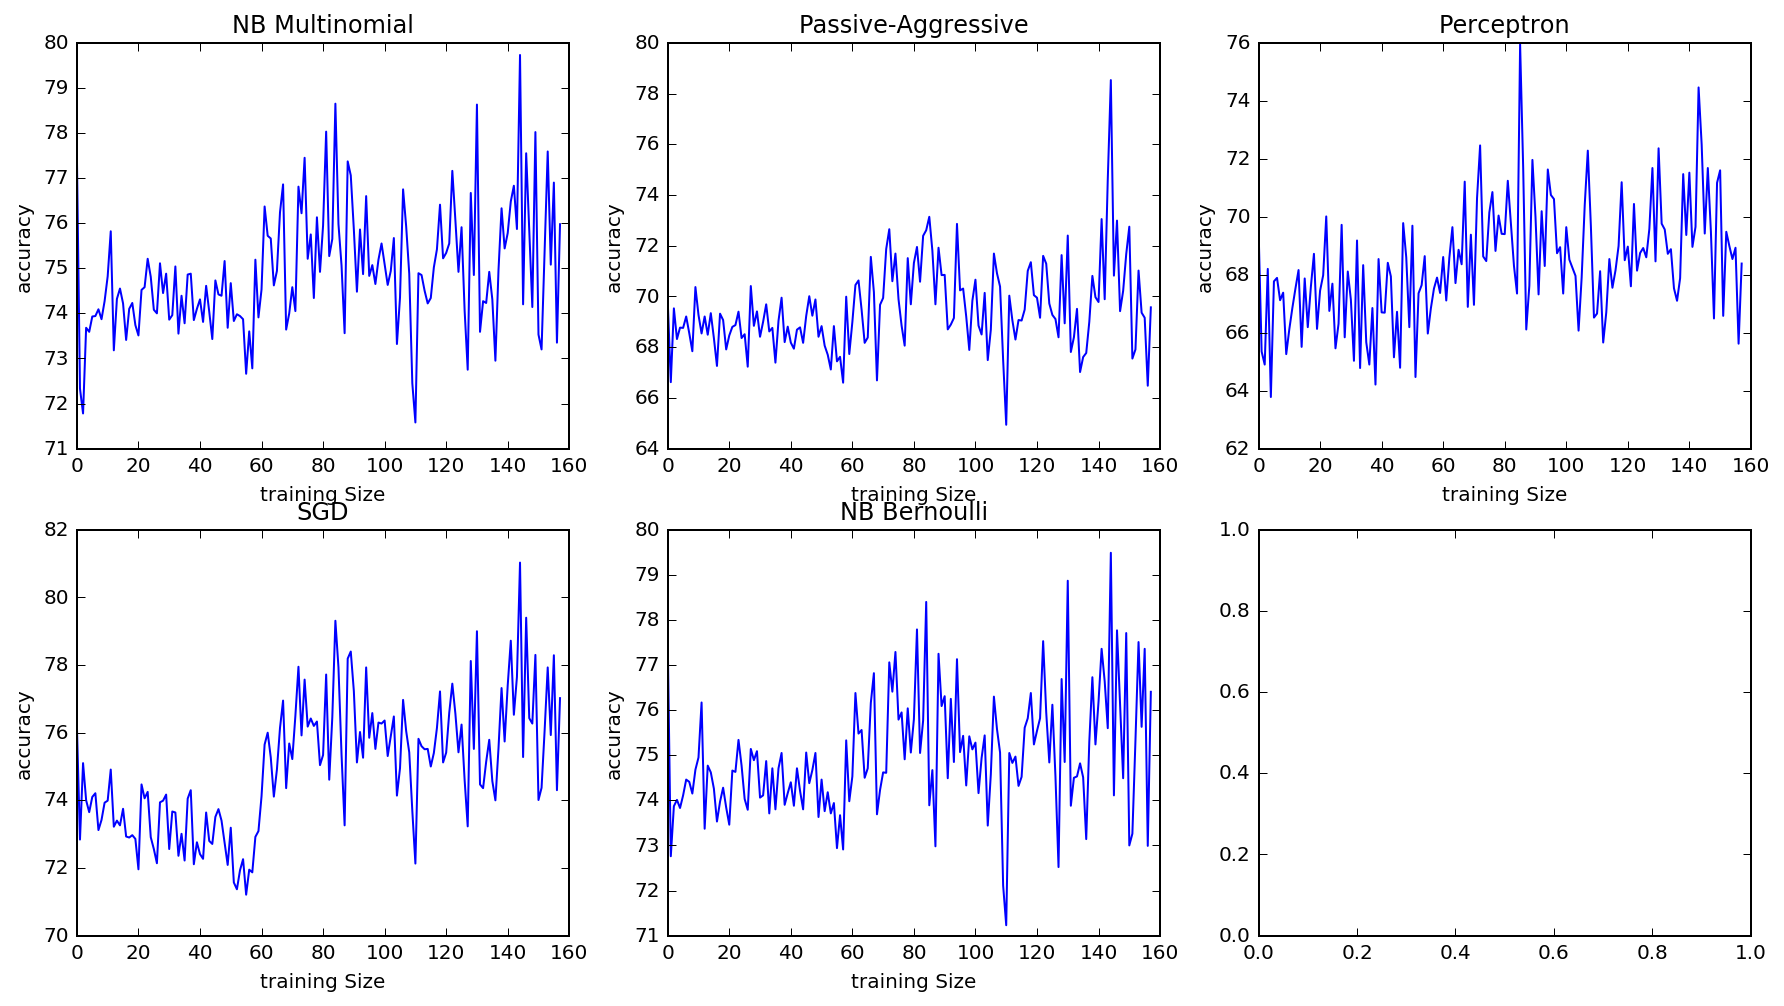

In [252]:
#print(classifier_information['SGD'])
#x = column(accuracy_info, 0)
#y = column(accuracy_info, 1)
#plt.plot(classifier_information['Preception'])
from sklearn.externals import joblib

joblib.dump(partial_fit_classifiers['SGD'], 'SGDClassifierOnSat.pkl')
joblib.dump(partial_fit_classifiers['Perceptron'], 'PerceptronClassifierOnSat.pkl')
joblib.dump(partial_fit_classifiers['NB Multinomial'], 'NBMClassifierOnSat.pkl')
joblib.dump(partial_fit_classifiers['Passive-Aggressive'], 'PAClassifierOnSat.pkl')
joblib.dump(partial_fit_classifiers['NB Bernoulli'], 'NBBClassifierOnSat.pkl')
i = 0
fig, axes = plt.subplots(2, 3, squeeze=True, figsize=(15, 8))
for item in classifier_information:
    axes[i//3,i%3].plot(classifier_information[item])
    axes[i//3,i%3].set_title(item)
    axes[i//3,i%3].set_ylabel("accuracy")
    axes[i//3,i%3].set_xlabel("training Size")
    i+=1


# Classifier For Amazon data 
** Feature extraction **

In [12]:
def compute_bag_of_words(text, stopwords, vocab=None):
    vectorizer = CountVectorizer(stop_words = stopwords,vocabulary=vocab)
    vectors = vectorizer.fit_transform(text)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

def column(matrix, i):
    return [row[i] for row in matrix]


text_amazon = column(Amazon_data,1)
Y_amazon = column(Amazon_data,0)


bow, vocab = compute_bag_of_words(text_amazon, stopwords.words())
KBestModel = SelectKBest( k=1000).fit(bow, Y_amazon) 
indices = KBestModel.get_support(True)
bow_transformed = KBestModel.transform(bow)
print("bow = {}".format(bow.shape))




NameError: name 'Amazon_data' is not defined

In [116]:
from sklearn.externals import joblib

best_features_Amazon = np.array(vocab)[indices]
#print(best_features_Amazon)

file = open('Best_Features_Amazon.txt', 'w')
for word in best_features_Amazon:
    file.write("%s\n" % word)    


In [13]:
#input X is list of strings
def Transform_To_Input_Format_Amazon(X):
    with open('Best_Features_Amazon.txt') as f:
        features = f.readlines()
    features = [x.strip("\n") for x in features]
    X_transformed,vocab = compute_bag_of_words(X, stopwords.words(),features)
    return X_transformed
    
print(Transform_To_Input_Format_Amazon(["I am having a wonderfull day","Thank you very much"]))

  (0, 226)	1
  (1, 558)	1


** Classifier **

We train 6 different classifiers on each of the datasets to compare the performance of each classifier:
K-NN
SVM
Random Forest Classifier
Ridge Classifier
Bernoulli Naive Bayes
Mutlinomial Naive Bayes


In [254]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB




batches = []
Ys=[]
Y_amazon = np.array(Y_amazon)
y_all = np.unique(np.asarray(column(Amazon_data,0)))
print(y_all)
minibatch_size = 10000
start=0
# divide data into batches
while(start < bow.shape[0]):
    if(start + minibatch_size < bow.shape[0]):
        batch = bow[start:start+minibatch_size]
        Ys.append(Y_amazon[start:start+minibatch_size])
        batches.append(batch)
        start+=minibatch_size
    else:
        batch = bow[start:]
        Ys.append(Y_amazon[start:])
        batches.append(batch)
        start+=minibatch_size
    i += 1

        
#Classifiers      
partial_fit_Regressors = {
    #'SGD Regressor':SGDRegressor(),
    #'Passive-Aggressive Regressor' : PassiveAggressiveRegressor(),
     'SGD': SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0,
        learning_rate='optimal', loss='hinge', n_iter=300, n_jobs=1,
        penalty='l2', power_t=0.5, random_state=None, shuffle=True,
        verbose=0, warm_start=False),
    'Perceptron': Perceptron(penalty='l1', alpha=0.0001, fit_intercept=True, n_iter=50, 
                             shuffle=True, verbose=0, eta0=1.0, n_jobs=1, random_state=0, 
                             class_weight=None, warm_start=False),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
    'NB Bernoulli': BernoulliNB(alpha=0.1),
    
}
Regressors_information = {
    #'SGD Regressor':[],
    #'Passive-Aggressive Regressor':[],
    'SGD':[],
    'Perceptron': [],
    'NB Multinomial': [],
    'Passive-Aggressive': [],
    'NB Bernoulli':[],
}   
                   
cls_stats = {}       
                  

number_minibatch = len(batches)
    
print(number_minibatch)
FirstBatch = True
k = 0
# Main loop : iterate on mini-batches of examples
for i in range(number_minibatch):
    print("Batch number = {}".format(i))
    batch = batches[i]
    X = batch
    Y = Ys[i]
    #classifiers
    for cls_name, cls in partial_fit_Regressors.items():
        tick = time.time()
        #cross_validation
        kf = KFold(n_splits = 10)
        results =[]
        for train_index,test_index in kf.split(X):
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            if(FirstBatch and cls_name != "SGD Regressor" and cls_name != "Passive-Aggressive Regressor"):
                cls.partial_fit(X_train, Y_train, classes = y_all)
                train_pred = cls.predict(X_test)
                results.append(100*sklearn.metrics.accuracy_score(Y_test, train_pred))
            else:
                #Y_train = [int(x) for x in Y_train]
                #Y_test = [int(x) for x in Y_test]
                cls.partial_fit(X_train, Y_train)
                train_pred = cls.predict(X_test)
                results.append(100*sklearn.metrics.accuracy_score(Y_test, train_pred))
                #results.append(sklearn.metrics.mean_squared_error(Y_test, train_pred))
        Regressors_information[cls_name].append(np.mean(np.array(results)))
    FirstBatch = False

['1' '2' '3' '4' '5']
4
Batch number = 0
Batch number = 1
Batch number = 2
Batch number = 3


** Accuracy of Classifiers **


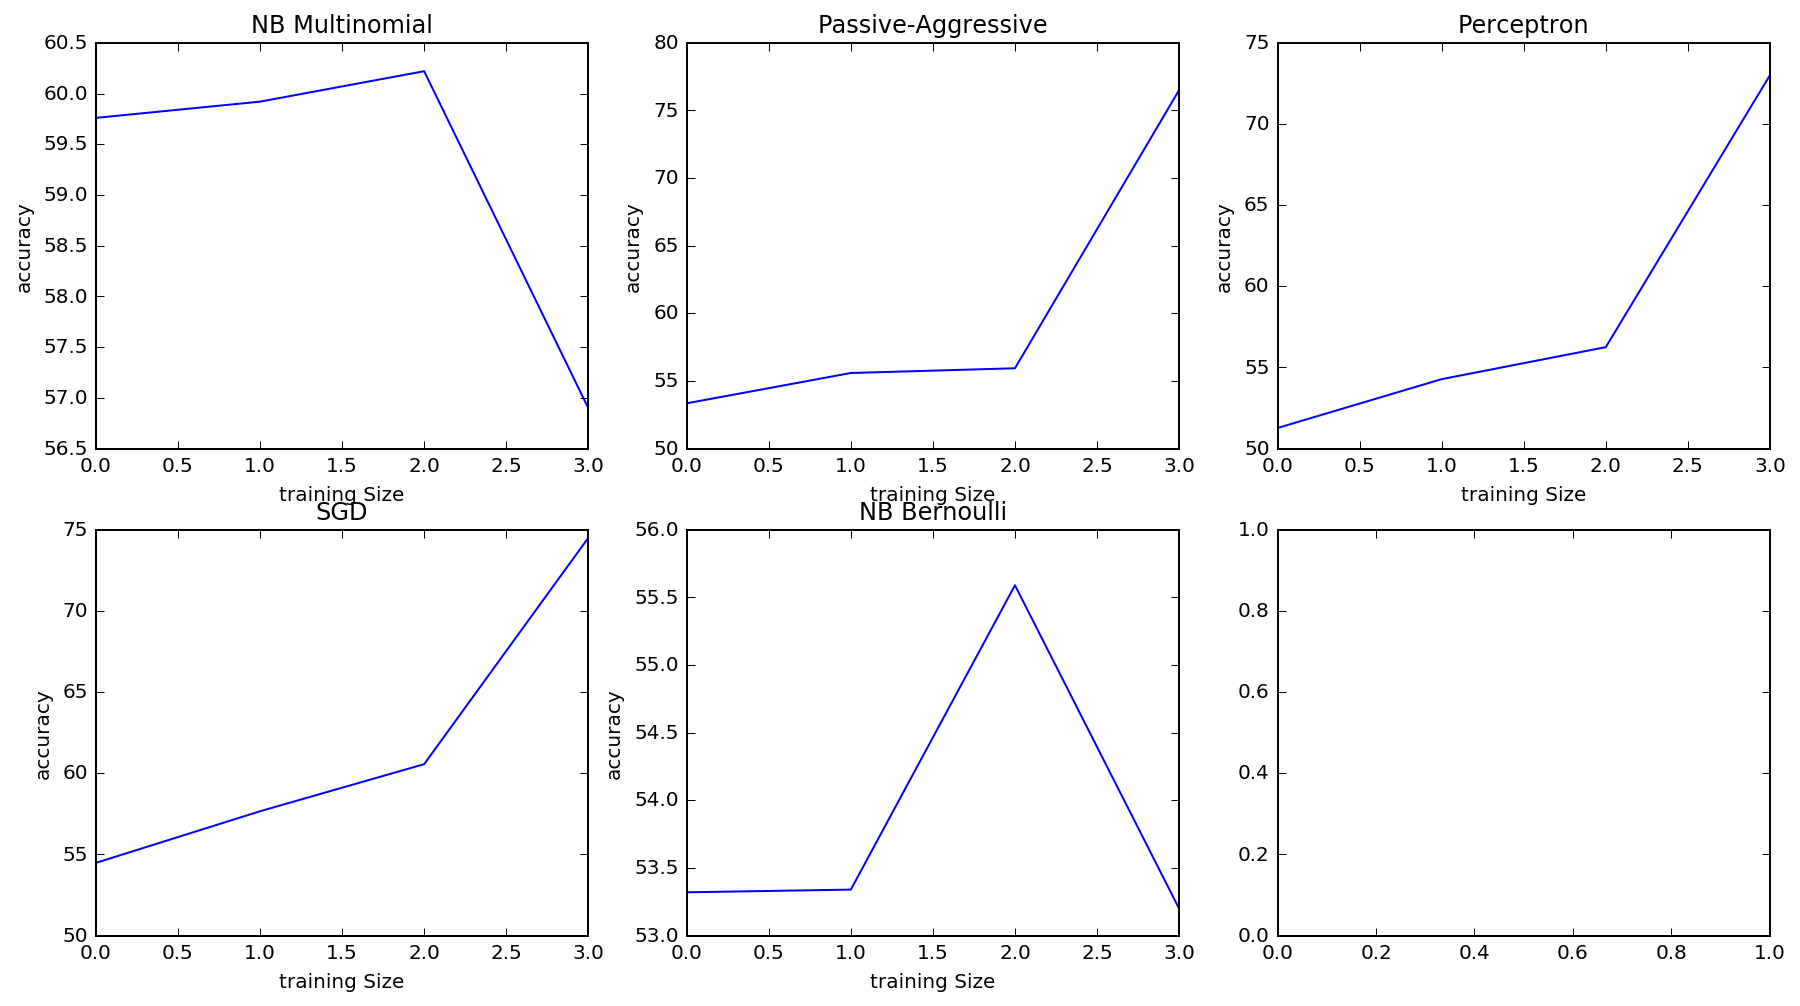

In [255]:
joblib.dump(partial_fit_Regressors['SGD'], 'SGDClassifierOnSat.pkl')
joblib.dump(partial_fit_Regressors['Perceptron'], 'PerceptronClassifierOnSat.pkl')
joblib.dump(partial_fit_Regressors['NB Multinomial'], 'NBMClassifierOnSat.pkl')
joblib.dump(partial_fit_Regressors['Passive-Aggressive'], 'PAClassifierOnSat.pkl')
joblib.dump(partial_fit_classifiers['NB Bernoulli'], 'NBBClassifierOnSat.pkl')


fig, axes = plt.subplots(2, 3, squeeze=True, figsize=(15, 8))
i = 0
for item in Regressors_information:
    axes[i//3,i%3].plot(Regressors_information[item])
    axes[i//3,i%3].set_title(item)
    axes[i//3,i%3].set_ylabel("accuracy")
    axes[i//3,i%3].set_xlabel("training Size")
    i+=1


## Datasets from Facebook and Twitter

Goal: collect comments from posts on Facebook and Twitter to evaluate the response of the audience (positive,negative).

## Facebook

In [8]:
import configparser

credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
token = credentials.get('facebook', 'token')

import requests  
import facebook 
import pandas as pd
from IPython.display import display
import os

#testing with EPFL page, run it with the page of a politician's page
page = 'EPFL.ch'   #nb comments #nb likes #location  #comments likes 
postId= 10155100406682590

#prepare data
from datetime import datetime

def convert_time(row):
    return datetime.strptime(row, '%Y-%m-%dT%H:%M:%S+0000')

In [196]:
def getAllComments(postId,nb_comments_per_post,serie,fb):
    fields_comments = 'comment_count,like_count,created_time,message'
    url_comments = 'https://graph.facebook.com/{}/comments/?fields={}&access_token={}'.format(postId, fields_comments, token)
    
    comment =0
    #print(nb_comments_per_post)
    while comment <= nb_comments_per_post + 1:
    
        post_comments=requests.get(url_comments).json()
        
        
        #print('len ',len(post_comments['data']))
        i=0
        for com in post_comments['data']:
            i=i+1
           
            comment_message=com['message']
            serie['comment message'] = comment_message
            serie['comment time'] = com['created_time']
            serie['comment likes'] =  com['like_count']
            serie['comment id']=com['id']

            fb = fb.append(serie, ignore_index=True)
            comment=comment+1
        #print('i',i)
        #print(fb['comment message'])
        try:
            url_comments = post_comments['paging']['next']
        except KeyError:
            
            break
    
    return fb

        
    
    

In [251]:

def lastPostsReactions(page,filename,n):
    fields = 'id,created_time,message,likes.limit(0).summary(1),comments.limits(0).summary(1)'
    url = 'https://graph.facebook.com/{}/posts?fields={}&access_token={}'.format(page, fields, token)

    fb = pd.DataFrame(columns=['post message','post id','post time','post likes','nb of comments','comment id', 'comment message', 'comment time', 'comment likes'])# 'user name']) #'age', 'gender','location','political','religion','education'])
    serie={'post message':[],'post id':[],'post time':[],'post likes':[],'nb of comments':[],'comment id':[],'comment message':[],'comment time':[], 'comment likes':[]}#,'user name':[]} # 'age':[], 'gender':[],'location':[],'political':[],'religion':[],'education':[]};
    
    i=0
    while i < n: #len(fb) < n:
    
        posts = requests.get(url).json()
        
        # extract information for each of the received post
        for post in posts['data']:
           
            try:
                # Only work with posts with text.
                post_message = post['message']
                postId=post['id']
                try:
                    # Only work with posts with comments which have text.
                    nb_comments_per_post=post['comments']['summary']['total_count']
                
                    x= post['comments']['data'][0]['message'] #IndexError if no comment on the page, only work with posts
                    # which have at least 1 comment
                    i=i+1
    
                    post_message=post['message']
                    serie['post message']=post_message
                    serie['post time']=post['created_time']
                    serie['post likes']=post['likes']['summary']['total_count']
                    serie['nb of comments']= post['comments']['summary']['total_count']
                    serie['post id']=post['id']
                    
                    fb = getAllComments(post['id'],nb_comments_per_post,serie,fb)
                                                     
                except IndexError or KeyError:
                    continue 
            except KeyError:
                continue       
        try:
            url = posts['paging']['next']
            #print('next')
        except KeyError:
            #print('no next')
            break
            
    fb['comment message'] = fb['comment message'].astype(str)
    fb['post message'] = fb['post message'].astype(str)
    fb['comment likes']  = fb['comment likes'].astype(int)
    fb['post likes']  = fb['post likes'].astype(int)
    fb['nb of comments']  = fb['nb of comments'].astype(int)
    fb['post time'] = fb['post time'].apply(convert_time)
    fb['comment time'] = fb['comment time'].apply(convert_time)

    print("Number of posts: ",i)
    #display(fb[:])
    
    folder = os.path.join( 'data', 'social_media')
    try:
        os.makedirs(folder)
    except FileExistsError:
        pass

    filename = os.path.join(folder, 'facebook'+ filename +'.sqlite')
    fb.to_sql('facebook', 'sqlite:///' + filename, if_exists='replace')
        
                               
                               
    return fb


In [252]:
def postReactions (postId,postType,filename):
    #fields = 'id,created_time,message,likes.limit(0).summary(1),comments.limits(0).summary(1)'
    
    if postType==0:
        fields = 'id,updated_time,message,likes.limit(0).summary(1),comments.limits(0).summary(1)'
    else:
        fields = 'id,created_time,message,likes.limit(0).summary(1),comments.limits(0).summary(1)'
        
    url = 'https://graph.facebook.com/{}?fields={}&access_token={}'.format(postId, fields, token)

    fb = pd.DataFrame(columns=['post message','post id','post time','post likes','nb of comments','comment id', 'comment message', 'comment time', 'comment likes'])# 'user name']) #'age', 'gender','location','political','religion','education'])
    serie={'post message':[],'post id':[],'post time':[],'post likes':[],'nb of comments':[],'comment id':[],'comment message':[],'comment time':[], 'comment likes':[]}#,'user name':[]} # 'age':[], 'gender':[],'location':[],'political':[],'religion':[],'education':[]};
    
    post = requests.get(url).json()
    
    try:
        # Only work with posts with text.
        test = post['message']
        
        try:
            # Only work with posts with comments which have text.
            nb_comments_per_post=post['comments']['summary']['total_count']
            #print(nb_comments_per_post,' comments')
                
            x= post['comments']['data'][0]['message'] #IndexError if no comment on the page, only work with posts
            # which have at least 1 comment
            
            post_message=post['message']
            serie['post message']=post_message
            #serie['post time']=post['created_time']
            
            if postType==0:
                serie['post time']=post['updated_time']
            else:
                serie['post time']=post['created_time']
            
            serie['post likes']=post['likes']['summary']['total_count']
            serie['nb of comments']= post['comments']['summary']['total_count']
            serie['post id']=post['id']
        
            fb = getAllComments(postId,nb_comments_per_post,serie,fb)
                                     
        except IndexError or KeyError:
            print('')
    except KeyError:
        print('')

            
    fb['comment message'] = fb['comment message'].astype(str)
    fb['post message'] = fb['post message'].astype(str)
    fb['comment likes']  = fb['comment likes'].astype(int)
    fb['post likes']  = fb['post likes'].astype(int)
    fb['nb of comments']  = fb['nb of comments'].astype(int)
    fb['post time'] = fb['post time'].apply(convert_time)
    fb['comment time'] = fb['comment time'].apply(convert_time)
    
    #display(fb[:])
    
    folder = os.path.join( 'data', 'social_media')
    try:
        os.makedirs(folder)
    except FileExistsError:
        pass

    filename = os.path.join(folder, 'facebook'+ filename +'.sqlite')
    fb.to_sql('facebook', 'sqlite:///' + filename, if_exists='replace')

    
    return 


## Posts


In [ ]:
#test
#fb = lastPostsReactions(page,'EPFL',20)
#fb= postReactions(postId,'Monde')

#Donald Trump reaction to Meryl Streep speach
page = 'DonaldTrump'
postId= '10158439095420725'

fb= postReactions(postId,0,'DT1')

#Donald Trump speaks about a good relationship with Russia
page = 'DonaldTrump'
postId= '10158430269170725'

fb= postReactions(postId,0,'DT2')

#Donald Trump speaks about the defeat of the democrats
page = 'DonaldTrump'
postId= '10158423167515725'

fb= postReactions(postId,0,'DT3')

#Donald Trump speaks about Obamacare
page = 'DonaldTrump'
postId= '10158417912085725'

fb= postReactions(postId,0,'DT4')

In [2]:
#Donald Trump about winning more votes
page = 'DonaldTrump'
postId= '10158135498775725'

fb= postReactions(postId,0,'DT5')

#Hillary Clinton end year congratulations
page = 'hillaryclinton'
postId= '1376340812422444'

fb= postReactions(postId,0,'HC1')

#Hillary Clinton defeat speech
page = 'hillaryclinton'
postId= '1324421317614394'

fb= postReactions(postId,0,'HC2')

#Hillary Clinton asking for votes (before election)
page = 'hillaryclinton'
postId= '1322830897773436'

fb= postReactions(postId,1,'HC3')

#CNN article about orlando shooting's victims suing twitter and facebook
page = 'cnninternational'
postId= '10154812470324641'

fb= postReactions(postId,1,'CNN_OS1')

#CNN article about John McCain saying that Obama is responsible for the Orlando shooting
page = 'cnninternational'
postId= '10154219265779641'

fb= postReactions(postId,1,'CNN_OS2')

#CNN articles about gun sales after Orlando shooting
page = 'cnninternational'
postId= '10154210843679641'

fb= postReactions(postId,1,'CNN_OS3')

#CNN articles about Lena Dunham's aborption
page = 'cnninternational'
postId= '10154817313449641'

fb= postReactions(postId,1,'CNN_Ab1')

#CNN article about Texas fetus burial obliagtion
page = 'cnninternational'
postId= '10154738564069641'

fb= postReactions(postId,1,'CNN_Ab2')

#CNN article about pope abortion forgivness
page = 'cnninternational'
postId= '10154708071624641'

fb= postReactions(postId,1,'CNN_Ab3')

#David Cameron before brexit speaking about 
page = 'DavidCameronOfficial'
postId= '1216426805048302'

fb= postReactions(postId,1,'DC1')

#David Cameron before brexit speaking about 
page = 'DavidCameronOfficial'
postId= '1218229621534687'

fb= postReactions(postId,0,'DC2')

NameError: name 'token' is not defined

## Function to get predictions

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.externals import joblib

import sqlite3

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#function to get the SQLite file
def getTable(filename): #Example= 'facebookCNN_Ab1.sqlite'
    folder = os.path.join( 'data', 'social_media')
    filename = os.path.join(folder, filename)
    con = sqlite3.connect(filename)
    fb=pd.read_sql(('SELECT * FROM facebook'),con)
    return fb

#function to get the input of the classifier

def getInputComment(fb):
    val=fb['comment message']
    new_val= Transform_To_Input_Format_Amazon(val)
    return new_val

def getInputPost(fb):
    val=fb['post message']
    new_val= Transform_To_Input_Format_Amazon(val)
    return new_val

# function to get the prediction and add to 
def getAndAddPrediction(input_comment,input_post,fb,ClassifierName): # example ClassifierName='PAClassifierOnAmazon.pkl'
    prediction_comment=joblib.load(ClassifierName)
    sentiment_comment=prediction_comment.predict(input_comment)
    fb['comment sentiment']=sentiment_comment
    
    prediction_post=joblib.load(ClassifierName)
    sentiment_post=prediction_post.predict(input_post)
    fb['post sentiment']=sentiment_post
    return 
    



In [427]:
#test
#CNN article about pope abortion forgivness
page = 'cnninternational'
postId= '10154708071624641'

from IPython.display import display

#lastPostsReactions(page,'CNN_page',20)
fb_page =getTable('facebookCNN_page.sqlite')
input_comment=getInputComment(fb_page)
input_post=getInputPost(fb_page)
getAndAddPrediction(input_comment, input_post,fb_page,'PAClassifierOnAmazon.pkl')
display(fb_page[:])

#postReactions(postId,1,'CNN_Ab1')
fb_post =getTable('facebookDT3.sqlite')
input_comment=getInputComment(fb_post)
input_post=getInputPost(fb_post)
getAndAddPrediction(input_comment, input_post,fb_post,'PAClassifierOnAmazon.pkl')
display(fb_post[:])



,index,post message,post id,post time,post likes,nb of comments,comment id,comment message,comment time,comment likes,comment sentiment,post sentiment
0,0,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902484694641,The billboard has a smoke detector. Instead of...,2017-01-14 08:16:47.000000,9,5,5
1,1,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902477949641,Smokers need to be weaned off ethically and mo...,2017-01-14 08:12:08.000000,11,3,5
2,2,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902711584641,لقد قالها ترامب رئيس أمريكا ل cnn لصحفى لديكم ...,2017-01-14 10:18:29.000000,0,5,5
3,3,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902795029641,But dumb assssss will always smoke. It's hered...,2017-01-14 10:43:31.000000,0,1,5
4,4,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902484324641,Wat wud the billboard do if its for promoting ...,2017-01-14 08:16:22.000000,6,5,5
5,5,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902515309641,why CNN not yo broadcast Obama's news of endin...,2017-01-14 08:33:57.000000,1,5,5
6,6,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902505439641,how passive-aggressive can a policy get? well ...,2017-01-14 08:28:06.000000,2,5,5
7,7,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902651684641,"I have my own ""coughing billboard"" .... My non...",2017-01-14 09:51:11.000000,3,5,5
8,8,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902503724641,I think smokers should be left alone. Let them...,2017-01-14 08:26:46.000000,2,5,5
9,9,Pretty clever,18793419640_10154902452889641,2017-01-14 08:00:02.000000,2056,63,10154902452889641_10154902621494641,Smokers required various support programs for ...,2017-01-14 09:35:42.000000,1,1,5


,index,post message,post id,post time,post likes,nb of comments,comment id,comment message,comment time,comment likes,comment sentiment,post sentiment
0,0,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423776565725,I voted for Donald Trump but this stuff is get...,2017-01-06 16:16:52.000000,4664,5,5
1,1,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423784665725,"poor, poor brokenhearted liberals....EAT IT, a...",2017-01-06 16:18:10.000000,968,1,5
2,2,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_700220253485770,"Give the man a break, he's not even the presid...",2017-01-06 16:28:16.000000,996,1,5
3,3,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423780055725,Why are you still talking about an election 2 ...,2017-01-06 16:17:21.000000,1731,5,5
4,4,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423818100725,"I support Trump 100% but your right, election ...",2017-01-06 16:22:58.000000,678,3,5
5,5,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423786340725,Oh please shut up. Every tweet makes us the l...,2017-01-06 16:18:22.000000,803,2,5
6,6,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_700216760152786,Keep the tweets up Mr. President. It's the act...,2017-01-06 16:25:07.000000,429,5,5
7,7,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_700216080152854,"Had Hillary won, we wouldn't be hearing about ...",2017-01-06 16:24:22.000000,274,5,5
8,8,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423800600725,"I don't really care who ""hacked"" the DNC! Wha...",2017-01-06 16:20:59.000000,240,5,5
9,9,Hillary and the Dems were never going to beat ...,10158423167515725,2017-01-06 14:27:39.000000,135759,11804,10158423167515725_10158423775845725,I saw the movement from here in Colorado. My ...,2017-01-06 16:16:46.000000,186,5,5


## Data Analysis 

In [496]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Functions for a post analysis

In [512]:
import dateutil.parser as dateparser
import matplotlib

# Give the audience response to the post in function of the time of the comments
#Plot an histogram

def SentimentVSTimefForAPost(fb,sentiment_type,bins): #sentiment_type = 'binary' or 'five'
    c=['red','orange','yellow','greenyellow','green']
    
    h=fb['comment time']
    sent=fb['comment sentiment']
    pm=fb['post message']
    pm=pm[1]
    
    pt=fb['post time']
    pt=pt[1]
    
    postId=fb['post id']
    postId=postId[1]

    t=[]
    for item in h:
        t.append(matplotlib.dates.date2num(dateparser.parse(item)))
        
    mu=np.mean(t)
    sigma=np.std(t)
    
    t2=[]
    sent2=[]
    
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.xlabel('Time')
    plt.ylabel('Number of comments')
    
    val0=[]
    val1=[]
    
    for i, item in enumerate(t):
        if np.abs((item-mu)/sigma)<10:
            t2.append(item)
            sent2.append(sent[i])
            
    if(sentiment_type=='five'):
        val2=[]
        val3=[]
        val4=[]
        for i in range(0,len(sent2)-1):
            if sent2[i]=='1':
                val0.append(t2[i])
            if sent2[i]=='2':
                val1.append(t2[i])
            if sent2[i]=='3':
                val2.append(t2[i])
            if sent2[i]=='4':
                val3.append(t2[i])
            if sent2[i]=='5':
                val4.append(t2[i])


    
        ax.hist([val0,val1,val2,val3,val4],log=True,color=c,label=['1=negative','2','3','4','5=positive'],bins=bins)
        
    if(sentiment_type=='binary'):
        for i in range(0,len(sent2)-1):
            if sent2[i]=='0':
                val0.append(t2[i])
            if sent2[i]=='1':
                val1.append(t2[i])  
        print(matplotlib.dates.date2num(val1))
        ax.hist([val0,val1],log=True,color=['lightblue','yellow'],label=['0=negative','1=positive'], bins=bins)


    #draw a red line at the time of the post
    matplotlib.pyplot.axvline(x=matplotlib.dates.date2num(dateparser.parse(pt)),color='blue')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    locator = matplotlib.dates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(matplotlib.dates.AutoDateFormatter(locator))
    fig.autofmt_xdate()
    matplotlib.pyplot.title(postId)
    plt.ylim(bottom=0.1)
    plt.show()
    

    return

# Give the correspondance between likes and the sentiment value of the comments
#plot number of comments VS numbers of likes on the comment with the sentimal value as a parameter 
def SentimentVSCommentsLikes(fb, sentiment_type):
    c=['red','orange','yellow','greenyellow','green']
    likes=fb['comment likes']
    
    postId=fb['post id']
    postId=postId[1]
    
    fig, ax = plt.subplots(1,1,figsize=(20,10))
   
    likes0=[]
    likes1=[]
    
    if(sentiment_type=='five'):
        likes2=[]
        likes3=[]
        likes4=[]
        for i in range(0,len(fb)-1):
            if fb.ix[i]['comment sentiment']=='1':
                likes0.append(likes[i])
            if fb.ix[i]['comment sentiment']=='2':
                likes1.append(likes[i])
            if fb.ix[i]['comment sentiment']=='3':
                likes2.append(likes[i])
            if fb.ix[i]['comment sentiment']=='4':
                likes3.append(likes[i])
            if fb.ix[i]['comment sentiment']=='5':
                likes4.append(likes[i])

        ax.hist([likes0,likes1,likes2,likes3,likes4],log=True,color=c,label=['1=negative','2','3','4','5=positive'],bins=[-0.5,0.5,2.5,6.5,14.5,30.5,62.5,126.5,254.5,510.5,1022.5])
   
    if(sentiment_type=='binary'):
        for i in range(0,len(fb)-1):
            if fb.ix[i]['comment sentiment']=='0':
                likes0.append(likes[i])
            if fb.ix[i]['comment sentiment']=='1':
                likes1.append(likes[i])
                
        ax.hist([likes0,likes1],log=True,color=['lightblue','yellow'],label=['0=negative','1=positive'],bins=bins)

    plt.xlim((-0.5,max(likes)))
    
    plt.xlabel('Number of likes')
    plt.ylabel('Number of comments')
    matplotlib.pyplot.title(postId)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.ylim(bottom=0.1)
    plt.show()
    return

# function for :  Sentiment evaluation over all comments of a post  (not in fucntion of the time)
def ReactionToAPost(fb,sentiment_type):
    c=['red','orange','yellow','greenyellow','green']
    mes=fb['comment message']
    pm=fb['post message']
    pm=pm[1]

    
    postId=fb['post id']
    postId=postId[1]


    
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.xlabel('Sentiment Value')
    plt.ylabel('Number of comments')
    
    val0=[]
    val1=[]
    
    if(sentiment_type=='five'):
        val2=[]
        val3=[]
        val4=[]
        val5=[]
        for i in range(0,len(fb)-1):
            if fb.ix[i]['comment sentiment']=='1':
                val0.append(0)
            if fb.ix[i]['comment sentiment']=='2':
                val1.append(1)
            if fb.ix[i]['comment sentiment']=='3':
                val2.append(2)
            if fb.ix[i]['comment sentiment']=='4':
                val3.append(3)
            if fb.ix[i]['comment sentiment']=='5':
                val4.append(4)
            
        
        ax.bar([1,2,3,4,5],[len(val0),len(val1),len(val2),len(val3),len(val4)],width=1)
        ax.set_xticks=([1.5,2.5,3.5,4.5,5.5])
        ax.set_xticklabels(('1','2','3','4','5'))
        
        
    if(sentiment_type=='binary'):
        for i in range(0,len(fb)-1):
            if fb.ix[i]['comment sentiment']=='0':
                val0.append(0)
            if fb.ix[i]['comment sentiment']=='1':
                val1.append(1) 
                
        ax.bar([1,2],[len(val0),len(val1)],width=1,color=['red','green'])
        ax.set_xticks=([1.5,2.5])
        ax.set_xticklabels(('0=negative','1=positive'))
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    matplotlib.pyplot.title(postId)
    
    plt.show()
    
    return


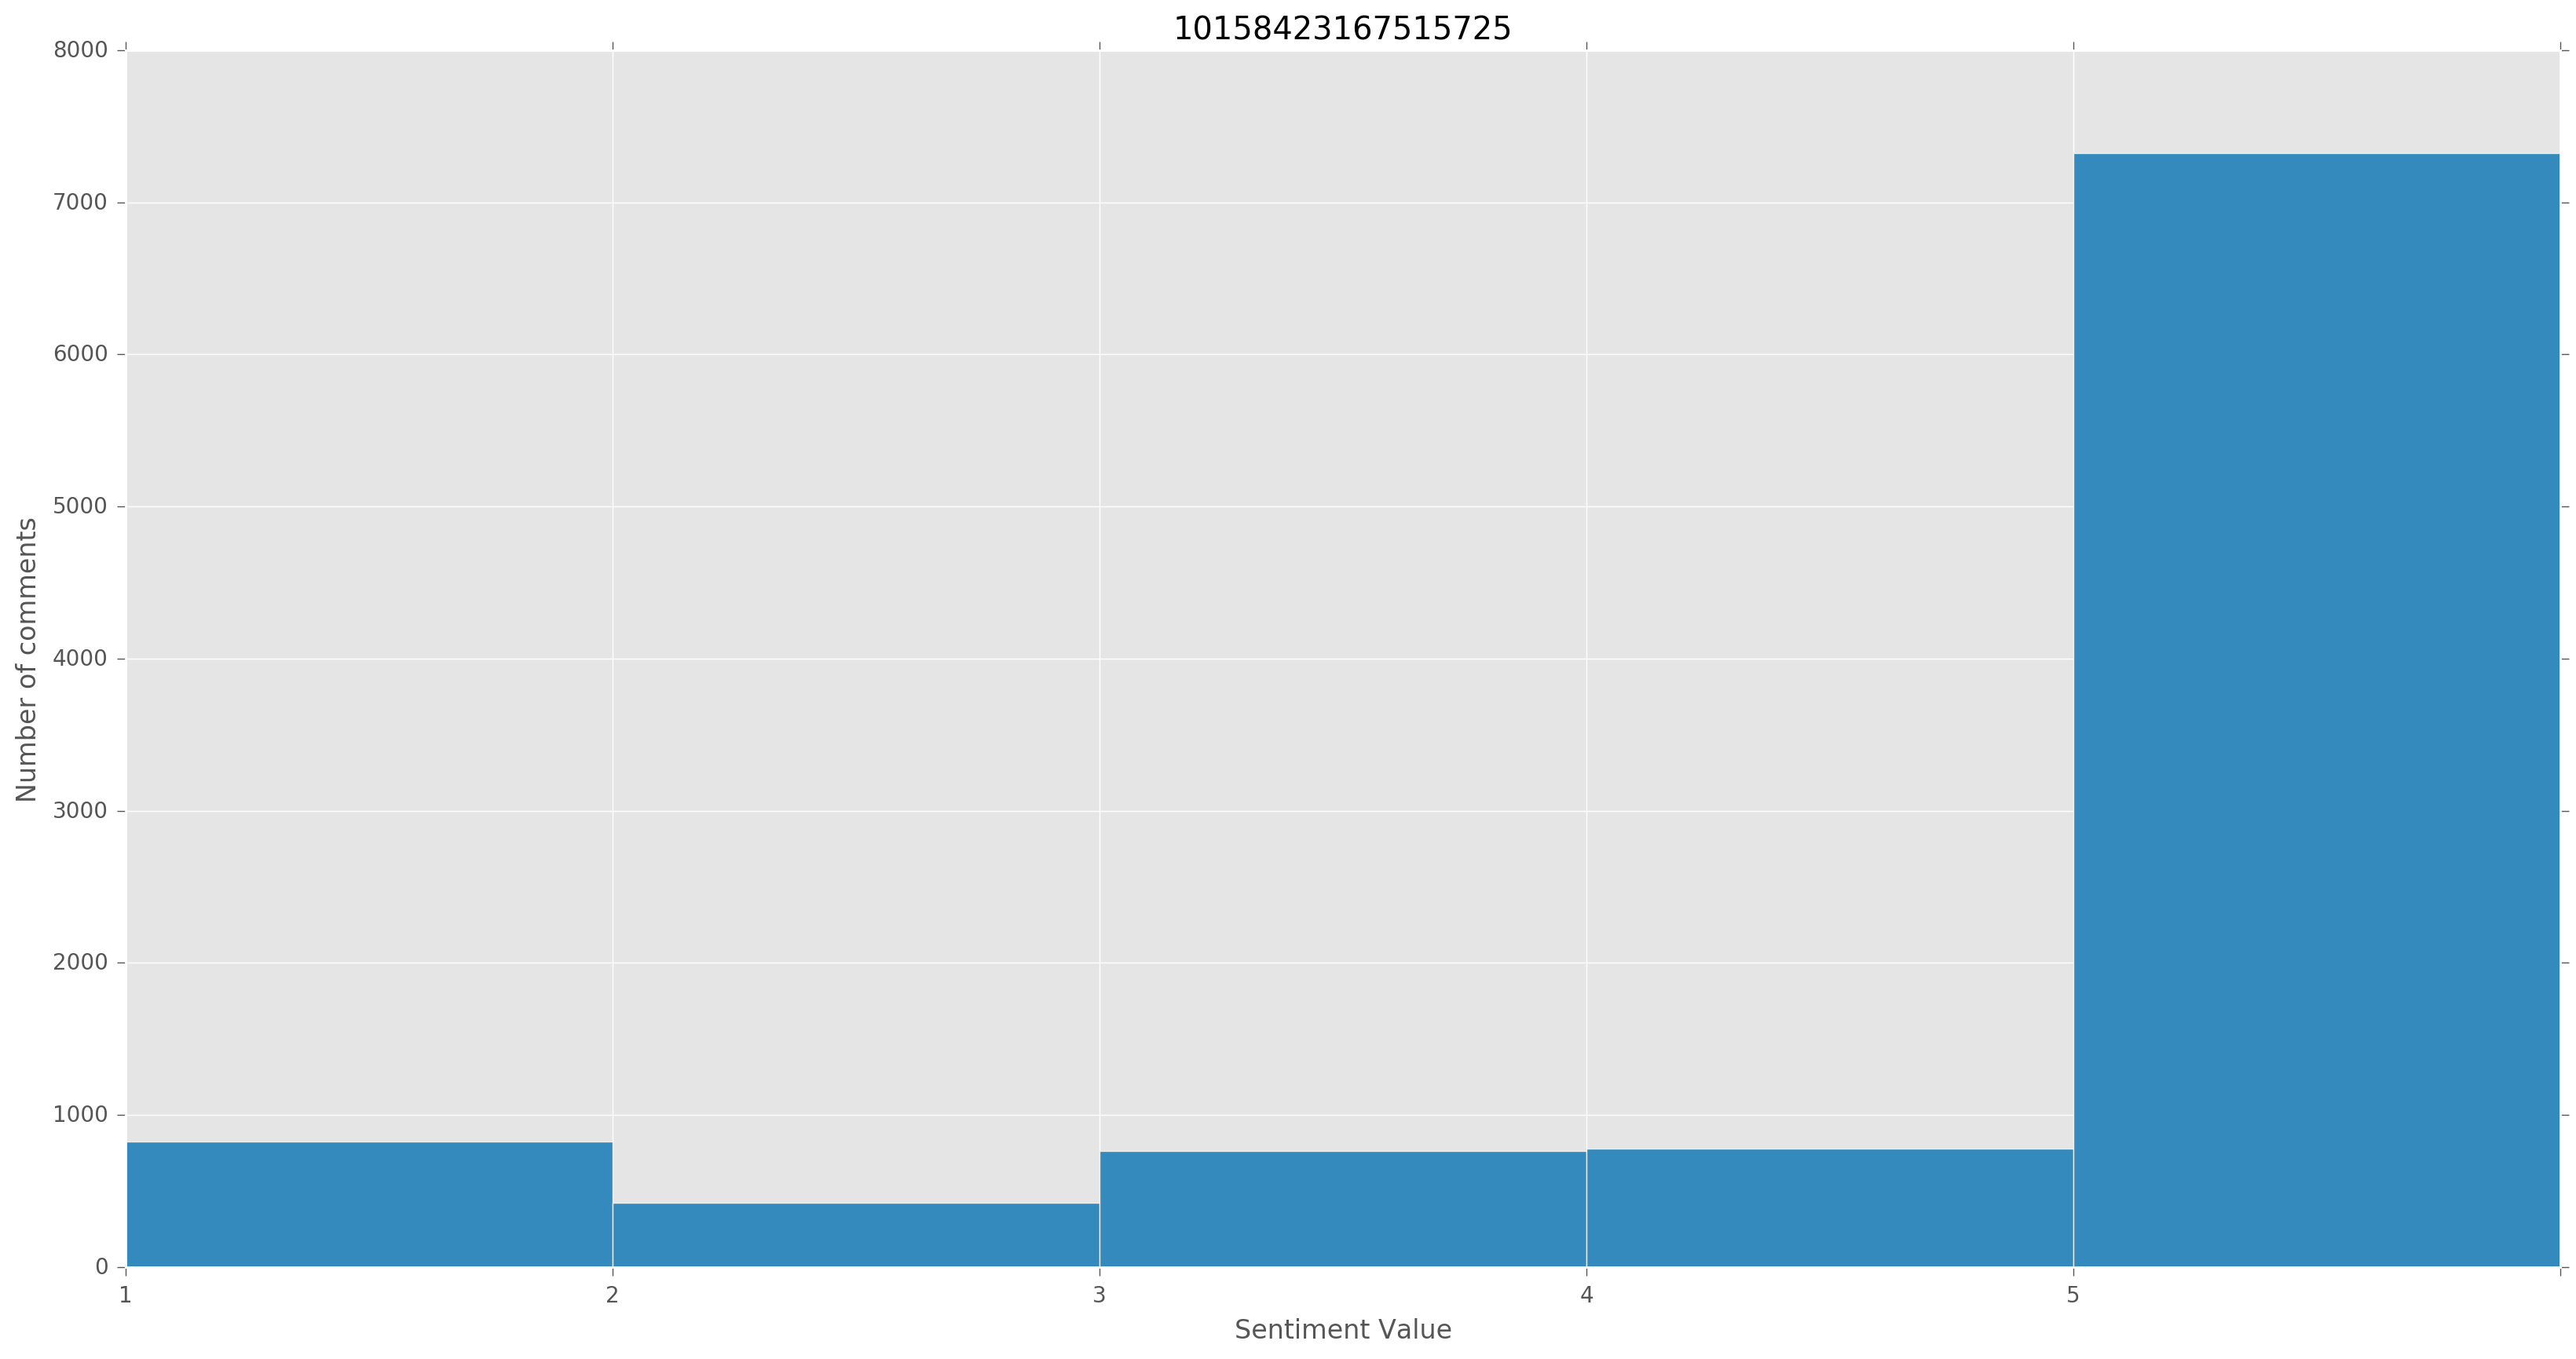

Post sentiment:  5


In [513]:
#test
#SentimentVSTimefForAPost(fb_post,'five',50)
#SentimentVSCommentsLikes(fb_post,'five')
ReactionToAPost(fb_post,'five')
post_sentiment=fb['post sentiment']
post_sentiment=post_sentiment[1]
print("Post sentiment: ", post_sentiment)



## Functions for a page analysis

In [502]:
## Functions for  a page analysis

# function for :Look the audience response to the posts in function of the time of the post. 
    
# look at the general audience response on the page.

# function for :If positive post , more likes ? more comments ? more positives/negatives comments ?. (also histogramme)
def PostsSentimentVSPostsLikes(fb,sentiment_type):
    c=['red','orange','yellow','greenyellow','green']
    likes=fb['post likes']
    
    fig, ax = plt.subplots(1,1,figsize=(20,10))

    likes1=[]

    if(sentiment_type=='five'):
        likes2=[]
        likes3=[]
        likes4=[]
        likes5=[]
        i=0
        x = True
        newPostId=''
        while(x) :
            lastPostId=newPostId
            newPostId=fb.ix[i]['post id']
                
            if fb.ix[i]['post sentiment']=='1':
                if(lastPostId != newPostId):
                    likes1.append(likes[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='2':
                if(lastPostId != newPostId):
                    likes2.append(likes[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='3':
                if(lastPostId != newPostId):
                    likes3.append(likes[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='4':
                if(lastPostId != newPostId):
                    likes4.append(likes[i])
                i = i + 1 
            if fb.ix[i]['post sentiment']=='5':
                if(lastPostId != newPostId):
                    likes5.append(likes[i])
                i = i + 1
            if i == len(fb)-1:
                x=False
        
        ax.hist([likes1,likes2,likes3,likes4,likes5],color=c,label=['1=negative','2','3','4','5=positive'])
   
    if(sentiment_type=='binary'):
        x=True
        i=0
        newPostId=''
        while x:
            lastPostId=newPostId
            newPostId=fb.ix[i]['post id']
            if fb.ix[i]['post sentiment']=='0':
                if(lastPostId != newPostId):
                    likes0.append(likes[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='1':
                if(lastPostId != newPostId):
                    likes1.append(likes[i])
                i = i + 1
            if i == len(fb)-1:
                x=False
                
        ax.hist([likes0,likes1],color=['lightblue','yellow'],label=['0=negative','1=positive'])


    
    plt.xlabel('Number of likes')
    plt.ylabel('Number of posts')
    matplotlib.pyplot.title('Posts sentiment VS Posts likes')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()
    return

def PostsSentimentsVSCommentsCount(fb,sentiment_type):
    c=['red','orange','yellow','greenyellow','green']
    count=fb['nb of comments']
    
    fig, ax = plt.subplots(1,1,figsize=(20,10))
   
    count0=[]
    count1=[]

    if(sentiment_type=='five'):
        count2=[]
        count3=[]
        count4=[]
        count5=[]
        
        i=0
        x = True
        newPostId=''
        while(x) :
            lastPostId=newPostId
            newPostId=fb.ix[i]['post id']
                
            if fb.ix[i]['post sentiment']=='1':
                if(lastPostId != newPostId):
                    count1.append(count[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='2':
                if(lastPostId != newPostId):
                    count2.append(count[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='3':
                if(lastPostId != newPostId):
                    count3.append(count[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='4':
                if(lastPostId != newPostId):
                    count4.append(count[i])
                i = i + 1 
            if fb.ix[i]['post sentiment']=='5':
                if(lastPostId != newPostId):
                    count5.append(count[i])
                i = i + 1
            if i == len(fb)-1:
                x=False
        #print(count0,count1,count2,count3,count4,count5)
        #print(len(count0)+len(count1)+len(count2)+len(count3)+len(count4)+len(count5))
        ax.hist([count1,count2,count3,count4,count5],color=c,label=['1=negative','2','3','4','5=positive'])
   
    if(sentiment_type=='binary'):
        x=True
        i=0
        newPostId=''
        while x:
            lastPostId=newPostId
            newPostId=fb.ix[i]['post id']
            if fb.ix[i]['post sentiment']=='0':
                if(lastPostId != newPostId):
                    count0.append(count[i])
                i = i + 1
            if fb.ix[i]['post sentiment']=='1':
                if(lastPostId != newPostId):
                    count1.append(count[i])
                i = i + 1
            if i == len(fb)-1:
                x=False
                
        ax.hist([count0,count1],color=['lightblue','yellow'],label=['0=negative','1=positive'])


    
    plt.xlabel('Number of comments')
    plt.ylabel('Number of posts')
    matplotlib.pyplot.title('Post sentiment VS Numbers of comments ')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()
    return
    


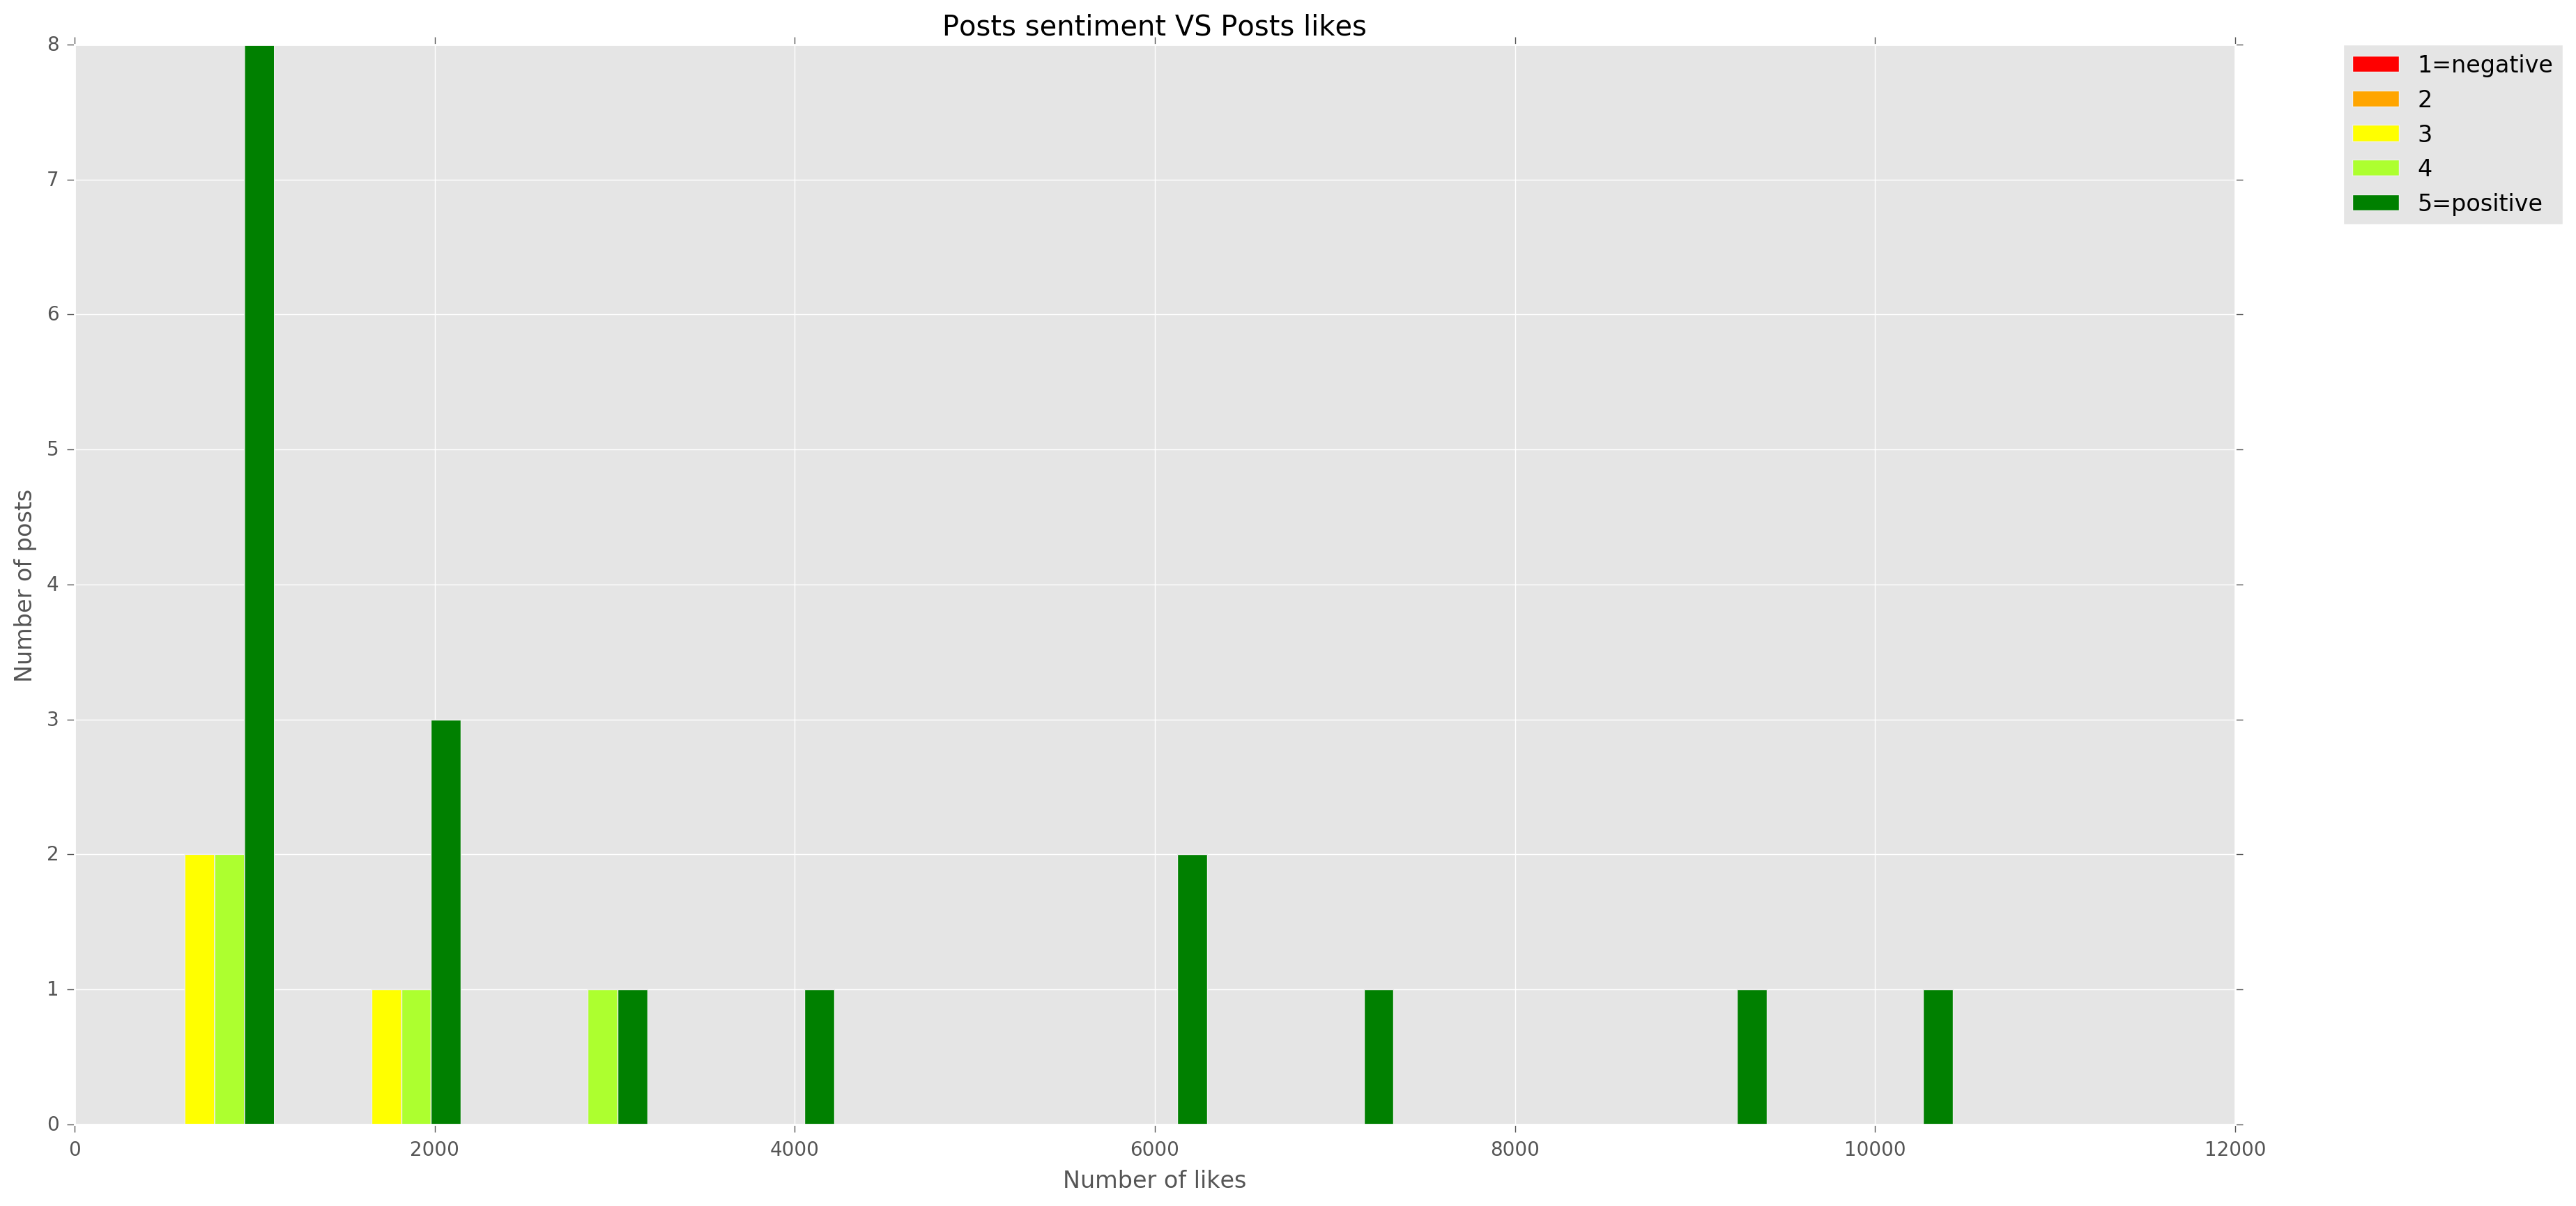

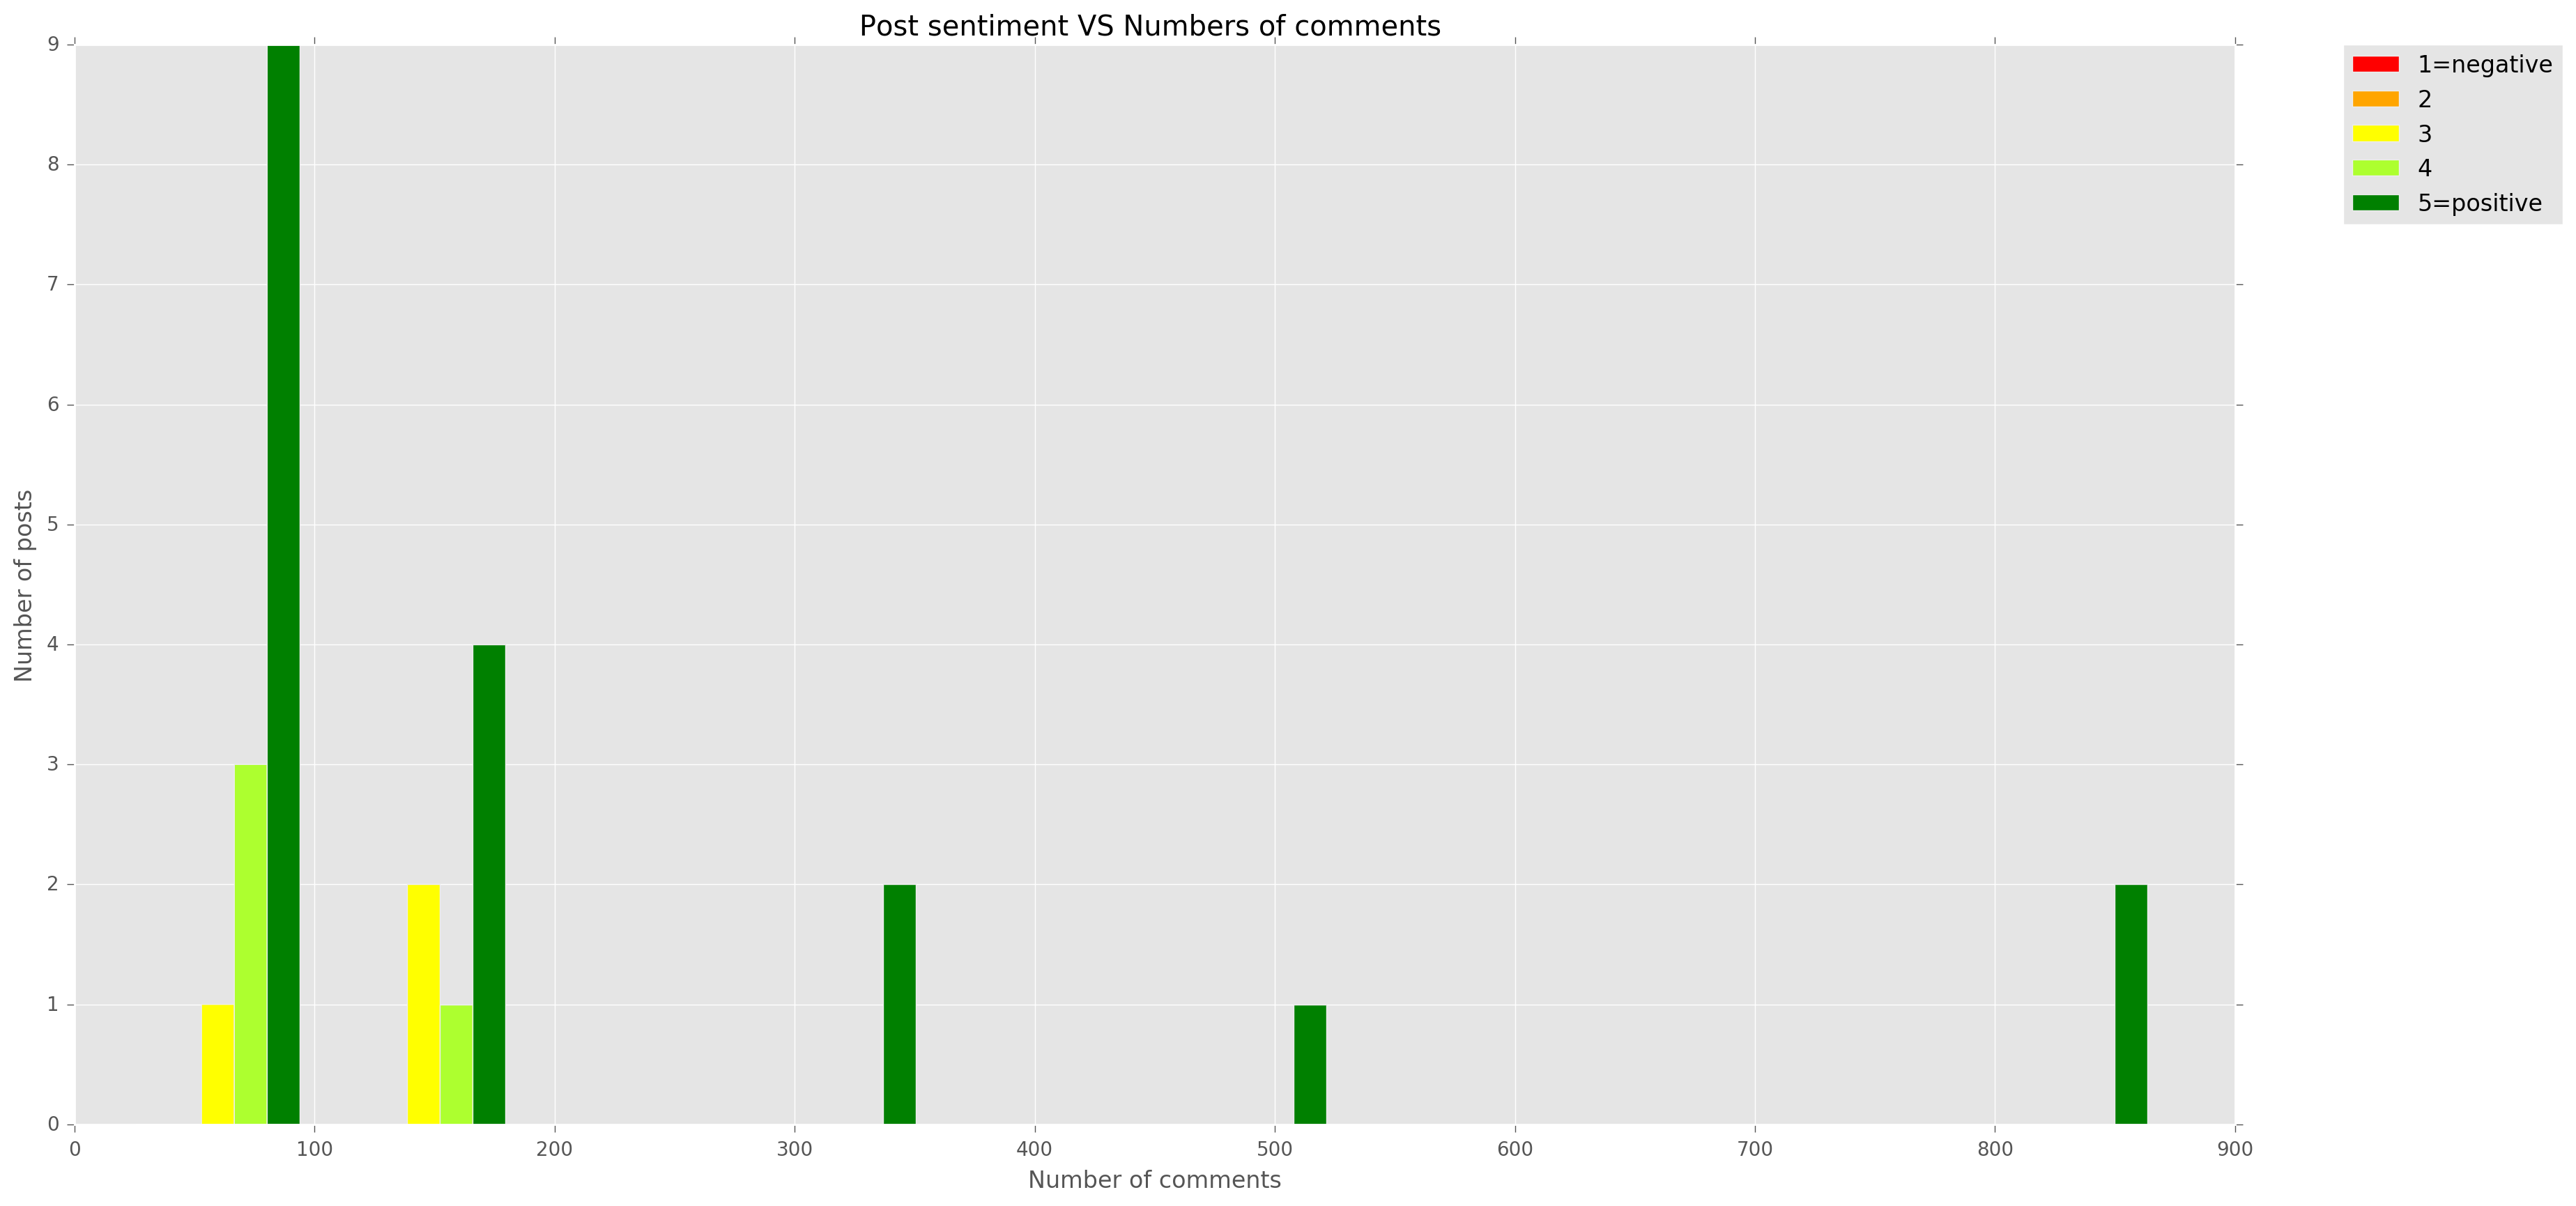

In [503]:
#test
PostsSentimentVSPostsLikes(fb_page,'five')
PostsSentimentsVSCommentsCount(fb_page,'five')

## Samuel's code

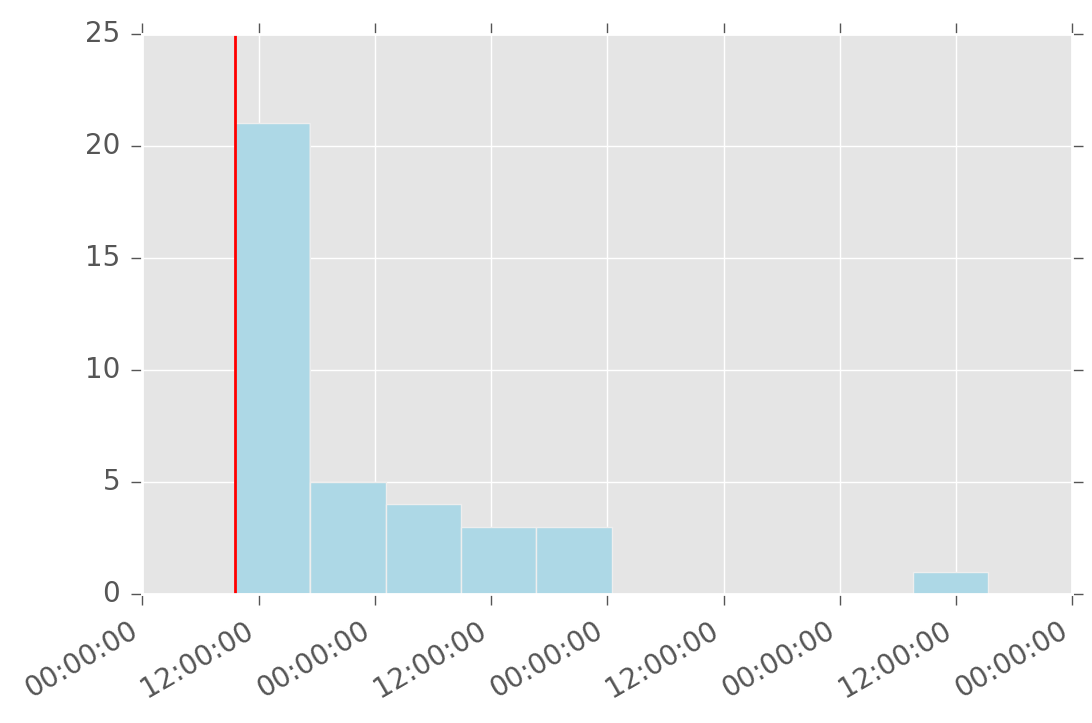

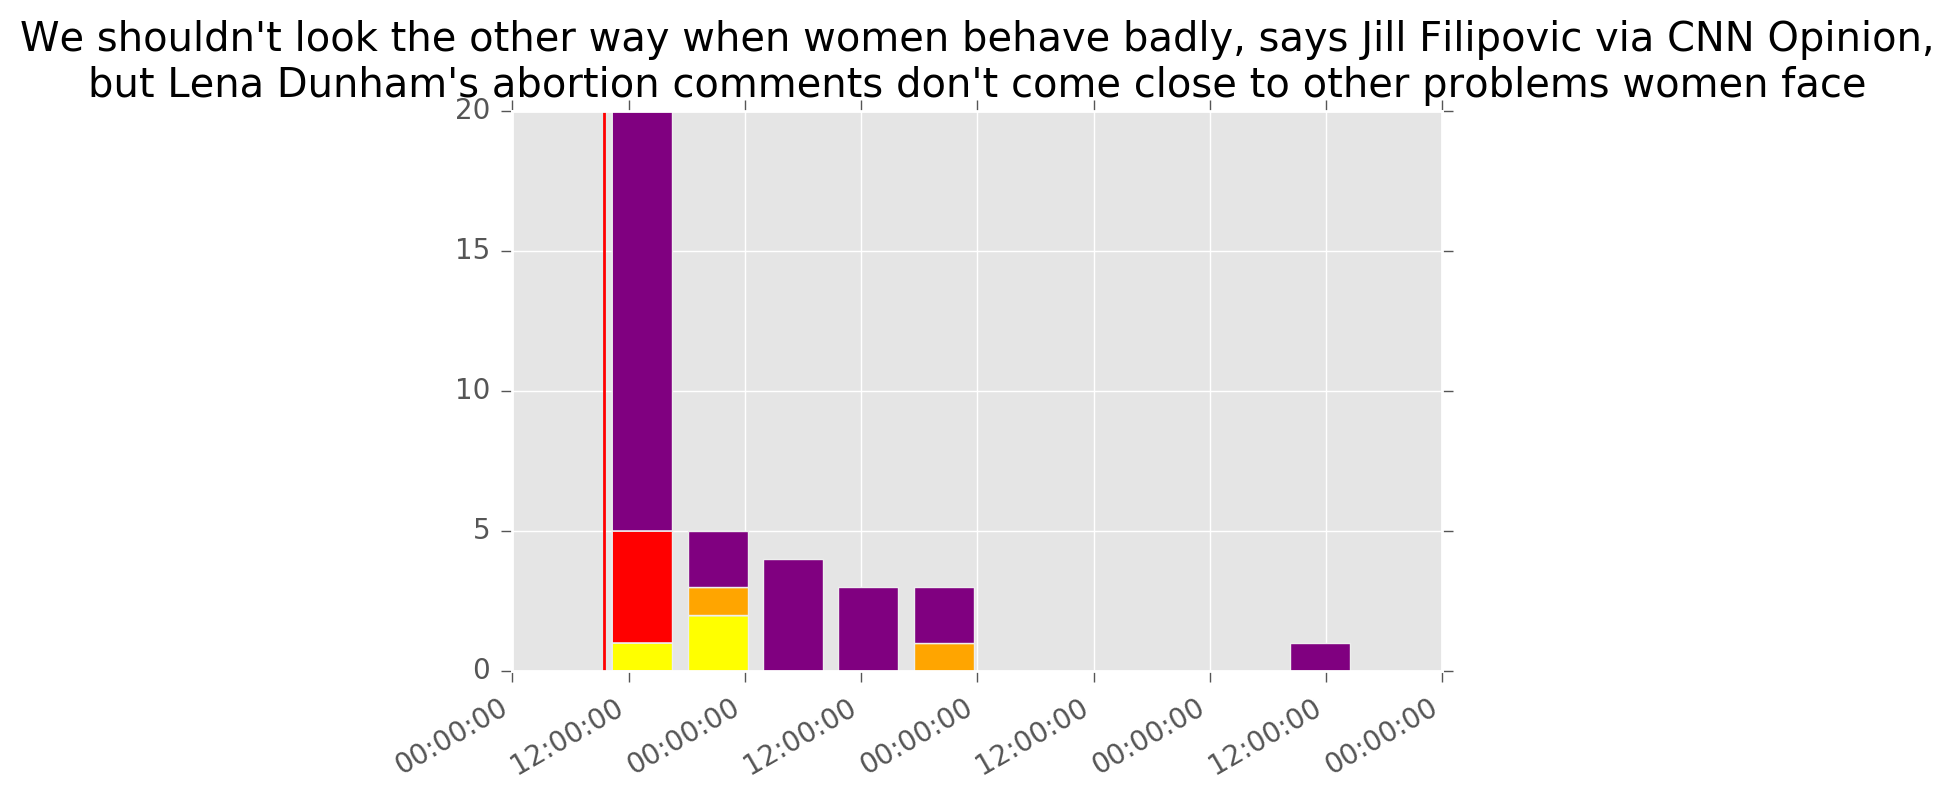

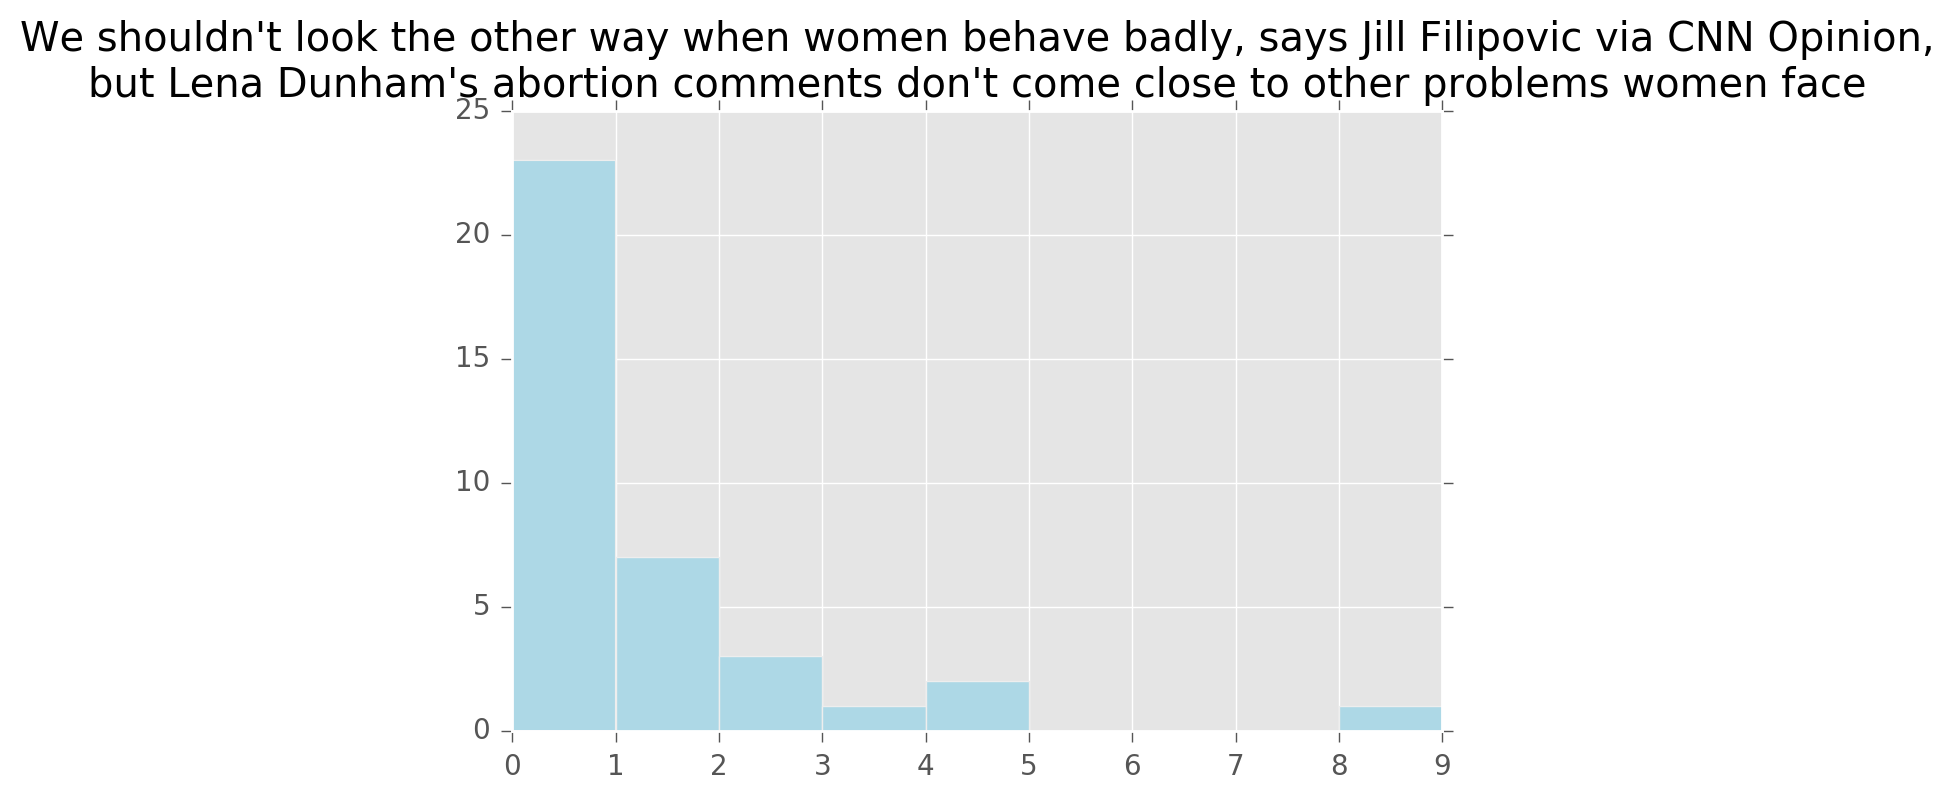

In [190]:
h=fb['comment time']
mes=fb['comment message']

import dateutil.parser as dateparser
import matplotlib

pm=fb['post message']
pm=pm[1]
pm=pm.replace('Opinion, ','Opinion,\n',1)

pt=fb['post time']
pt=pt[1]

likes=fb['comment likes']


t=[]

for item in h:
    t.append(dateparser.parse(item))
    #t.append(time.mktime(date.timetuple()))

val=[]
for i,item in enumerate(mes):
    val.append(i%2)

dates = matplotlib.dates.date2num(t)
#matplotlib.pyplot.plot_date(dates, val)

#matplotlib.pyplot.hist(dates,bins=100)


fig, ax = plt.subplots(1,1)
ax.hist(dates, bins=10, color='lightblue')

matplotlib.pyplot.axvline(x=matplotlib.dates.date2num(dateparser.parse(pt)),color='red')

locator = matplotlib.dates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(matplotlib.dates.AutoDateFormatter(locator))
fig.autofmt_xdate()
plt.show()

val0=[]
val1=[]
val2=[]
val3=[]
val4=[]
val5=[]
for i in range(1,len(pred)):
    if pred[i]=='0':
        val0.append(t[i])
    if pred[i]=='1':
        val1.append(t[i])
    if pred[i]=='2':
        val2.append(t[i])
    if pred[i]=='3':
        val3.append(t[i])
    if pred[i]=='4':
        val4.append(t[i])
    if pred[i]=='5':
        val5.append(t[i])

            
        

fig, ax = plt.subplots(1,1)
ax.hist([matplotlib.dates.date2num(val0),matplotlib.dates.date2num(val1),matplotlib.dates.date2num(val2),matplotlib.dates.date2num(val3),matplotlib.dates.date2num(val4),matplotlib.dates.date2num(val5)],color=['lightblue','yellow','green','red','orange','purple'], bins=10,histtype='barstacked')

matplotlib.pyplot.axvline(x=matplotlib.dates.date2num(dateparser.parse(pt)),color='red')

locator = matplotlib.dates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(matplotlib.dates.AutoDateFormatter(locator))
fig.autofmt_xdate()
matplotlib.pyplot.title(pm)
plt.show()

likes0=[]
likes1=[]
for i in range(1,len(val)):
    if val[i]==0:
        likes0.append(likes[i])
    else:
        likes1.append(likes[i])
        
        
fig, ax = plt.subplots(1,1)
ax.hist(likes, bins=max(likes),range=(0,max(likes)),color='lightblue',histtype='barstacked')

matplotlib.pyplot.title(pm)
plt.show()
